In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def read_image(im_name):
    image = cv2.imread(im_name)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()
    return image_rgb

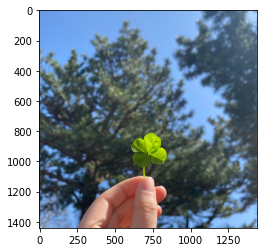

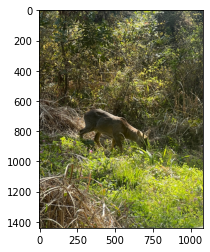

In [3]:
## To make function and read image 2
im1=read_image('image.jpeg')
im2=read_image('image2.jpeg')

In [4]:
print(im1.shape, im2.shape)

(1440, 1440, 3) (1440, 1080, 3)


## image cropping

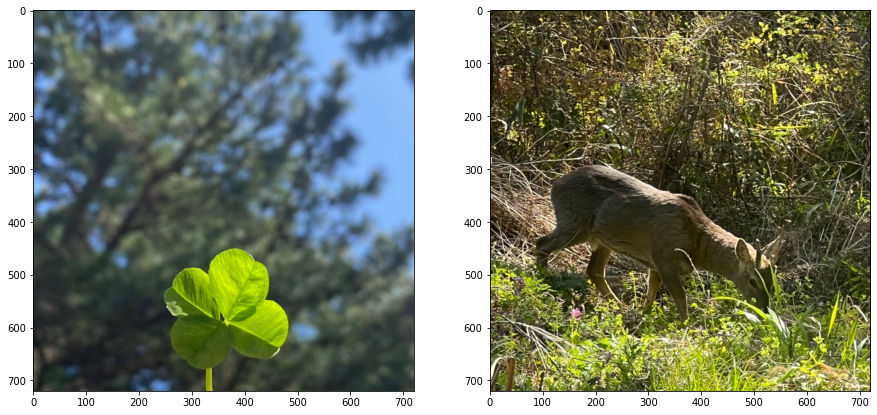

In [5]:
# Just do indexing!

h1, w1 = im1.shape[:2]
h2, w2 = im2.shape[:2]
size = 720

def center_crop(im,h,w,size=720):
    im = im[int(h/2-size/2):int(h/2+size/2), int(w/2-size/2):int(w/2+size/2)]
    return im

im1 = center_crop(im1, h1, w1, size)
im2 = center_crop(im2, h2, w2, size)


def two_image_show(im1, im2):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(im1)
    plt.subplot(1,2,2)    
    plt.imshow(im2)
    plt.show()


two_image_show(im1, im2)

## image masking

using bit-wise operations

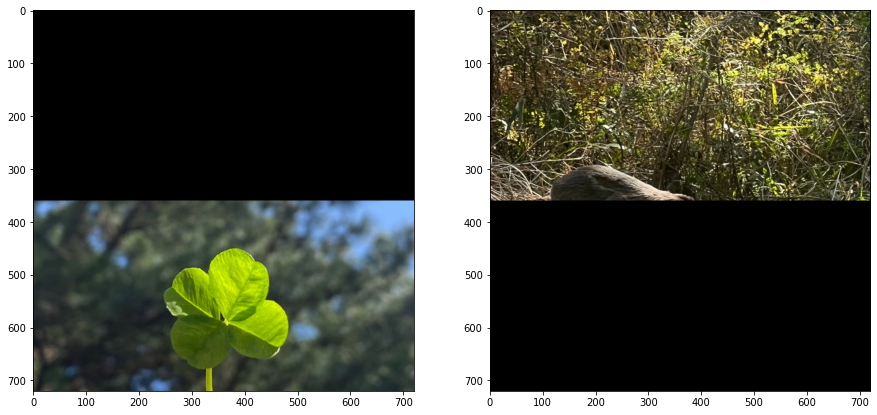

In [13]:
import numpy as np

im1_mask = np.zeros_like(im1)
im1_mask[int(size/2):,] = im1[int(size/2):,]
im2_mask = np.zeros_like(im2)
im2_mask[:int(size/2), ] = im2[:int(size/2), ]

two_image_show(im1_mask, im2_mask)

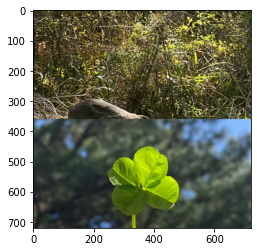

In [14]:
merge = cv2.bitwise_or(im1_mask, im2_mask)
plt.imshow(merge)
plt.show()

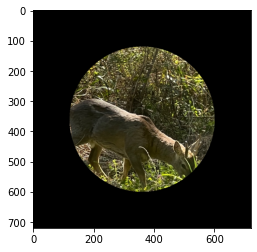

In [17]:
## circle mask
circle_mask = np.zeros_like(im2)
cv2.circle(circle_mask, (size//2,size//2), size//3, (255,255,255), -1 )
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

masked_im2 = cv2.bitwise_and(im2, circle_mask)

# plt.imshow(circle_mask)
plt.imshow(masked_im2)

In [18]:
plt.imsave('save_img.png', masked_im2)